<a href="https://colab.research.google.com/github/WeraP123/-Lab-Coursework-CE880/blob/main/Copy_of_MLProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Reading in data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
store = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/rossmann-store-sales/store.csv")
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/rossmann-store-sales/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/rossmann-store-sales/test.csv")

In [ ]:
store = pd.read_csv("/content/drive/MyDrive/store.csv")
train = pd.read_csv("/content/drive/MyDrive/train.csv")
#test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/rossmann-store-sales/test.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Merging data

In [ ]:
#merge store and training files
#better to have mor eints to determine better features when compressed
data = train.merge(store, on =['Store'], how = 'inner')
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


# Data exploration

In [ ]:
data.head()

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Promo2SinceWeek,...,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Year,Month,Day
0,1,2015-07-31,5263,555,1,1,1,1270.0,0,0.0,...,0,0,0,0,1,0,0,2015,07,31
1,1,2015-07-30,5020,546,1,1,1,1270.0,0,0.0,...,0,0,0,1,0,0,0,2015,07,30
2,1,2015-07-29,4782,523,1,1,1,1270.0,0,0.0,...,0,0,1,0,0,0,0,2015,07,29
3,1,2015-07-28,5011,560,1,1,1,1270.0,0,0.0,...,0,1,0,0,0,0,0,2015,07,28
4,1,2015-07-27,6102,612,1,1,1,1270.0,0,0.0,...,1,0,0,0,0,0,0,2015,07,27


In [ ]:
data['Open'].unique()

array([1, 0])

In [ ]:
len(data[data.Sales == 0])

172871

In [ ]:
len(data[data.Open == 0])

172817

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 32 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   Date                 1017209 non-null  object 
 2   Sales                1017209 non-null  int64  
 3   Customers            1017209 non-null  int64  
 4   Open                 1017209 non-null  int64  
 5   Promo                1017209 non-null  int64  
 6   SchoolHoliday        1017209 non-null  int64  
 7   CompetitionDistance  1017209 non-null  float64
 8   Promo2               1017209 non-null  int64  
 9   Promo2SinceWeek      1017209 non-null  float64
 10  Promo2SinceYear      1017209 non-null  float64
 11  StateHoliday_0       1017209 non-null  uint8  
 12  StateHoliday_a       1017209 non-null  uint8  
 13  StateHoliday_b       1017209 non-null  uint8  
 14  StateHoliday_c       1017209 non-null  uint8  
 15

In [ ]:
print("Number of rows", data.shape[0], ", variables: ", data.shape[1])
print("Number of stores", len(data['Store'].unique()))

Number of rows 1017209 , variables:  32
Number of stores 1115


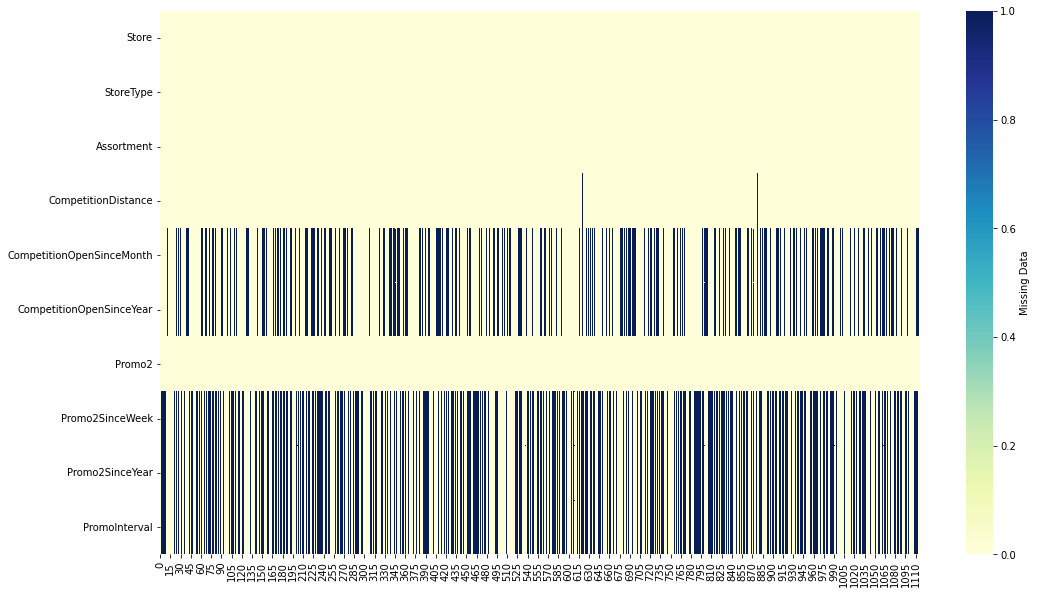

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(17,10))

sns.heatmap(store.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()

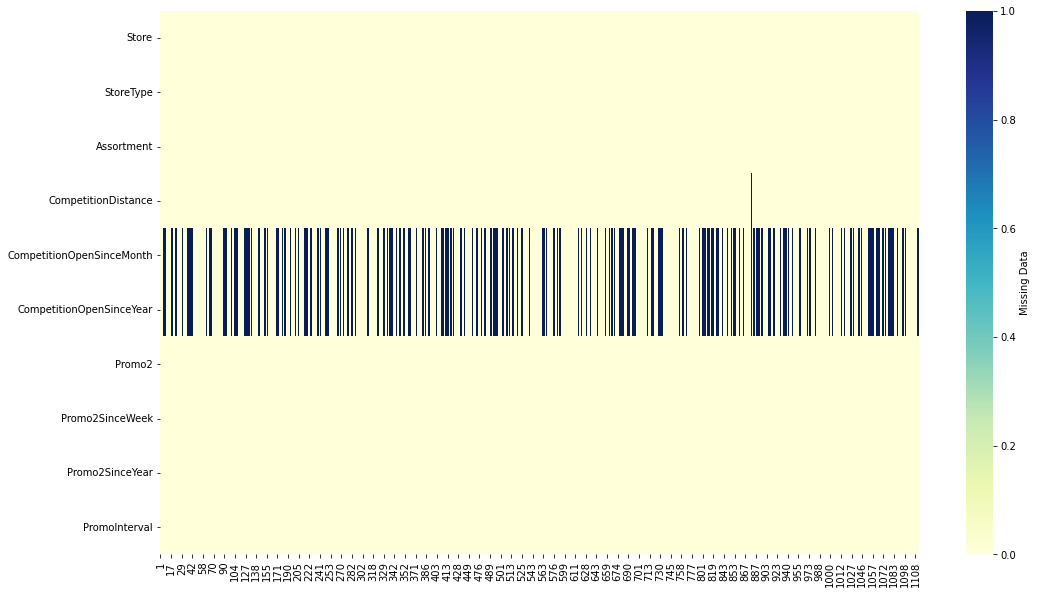

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(17,10))
df = store[store.Promo2 != 0]
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()


In [ ]:
#looking at a the percentage of stores open
d_close = data [data.Sales == 0]
d_open = data[data.Sales !=0]
print(f"{d_close.shape[0]/data.shape[0]*100:.2f}% of store are close,  {d_open.shape[0]/data.shape[0]*100:.2F}% of stores are open")
                                                                        



16.99% of store are close,  83.01% of stores are open


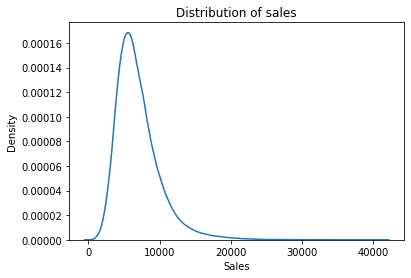

In [ ]:
#looking at out target vriable (sales)
plt.title("Distribution of sales")
plt.xlabel("Sales")
graph = sns.kdeplot(x="Sales", data= d_open)

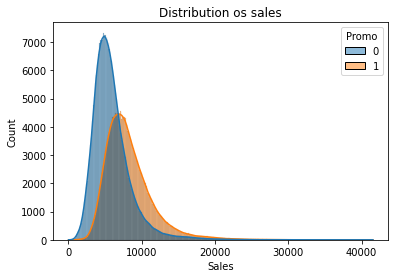

In [ ]:
plt.title("Distribution os sales")
plt.xlabel("Sales")
graph = sns.histplot(x = "Sales", data=d_open, kde=True, hue='Promo') 

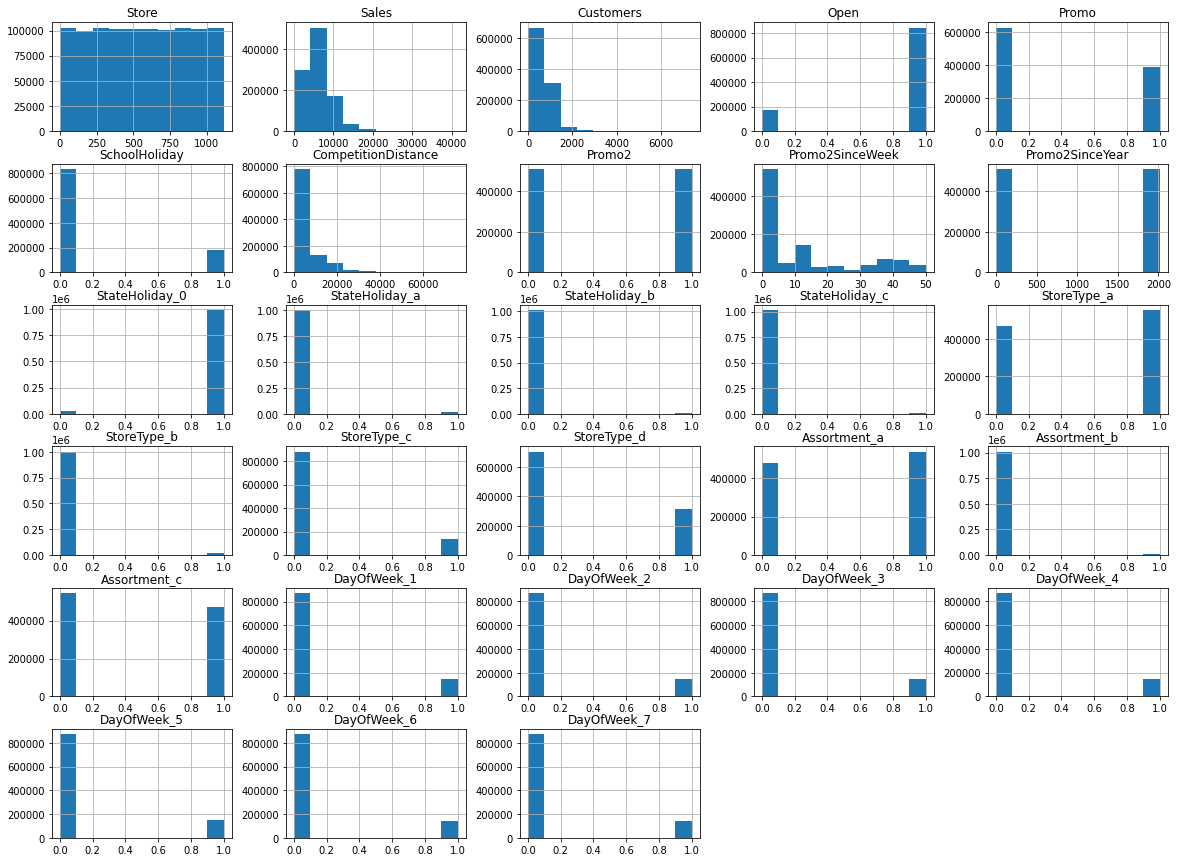

In [ ]:
data.hist(figsize = (20, 15))
plt.show()

# Data cleaning

In [ ]:
for col in data.columns:    
  print(col, data[col].isna().sum())

Store 0
DayOfWeek 0
Date 0
Sales 0
Customers 0
Open 0
Promo 0
StateHoliday 0
SchoolHoliday 0
StoreType 0
Assortment 0
CompetitionDistance 2642
CompetitionOpenSinceMonth 323348
CompetitionOpenSinceYear 323348
Promo2 0
Promo2SinceWeek 508031
Promo2SinceYear 508031
PromoInterval 508031


In [ ]:
print("Values of StateHoliday ",data['StateHoliday'].unique())
data['StateHoliday'] = data['StateHoliday'].replace([0, '0'], '0')
print("Replaced values of StateHoliday", data['StateHoliday'].unique())

Values of StateHoliday  ['0' 'a' 'b' 'c' 0]
Replaced values of StateHoliday ['0' 'a' 'b' 'c']


In [ ]:
data = data.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", 'PromoInterval'], axis =1)

In [ ]:
data["CompetitionDistance"].fillna(value=data["CompetitionDistance"].mean(), inplace=True)
data[["Promo2SinceWeek", "Promo2SinceYear"]] = data[["Promo2SinceWeek", "Promo2SinceYear"]].fillna(0)

In [ ]:
#data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True)

In [ ]:
data.shape

(1017209, 15)

In [ ]:
for col in data.columns:    
  print(col, data[col].isna().sum())

Store 0
DayOfWeek 0
Date 0
Sales 0
Customers 0
Open 0
Promo 0
StateHoliday 0
SchoolHoliday 0
StoreType 0
Assortment 0
CompetitionDistance 0
Promo2 0
Promo2SinceWeek 0
Promo2SinceYear 0


# Data transformation

In [ ]:
data = pd.get_dummies(data, columns= ['StateHoliday', 'StoreType', 'Assortment','DayOfWeek'])
data.head()  

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Promo2SinceWeek,...,Assortment_a,Assortment_b,Assortment_c,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,1,2015-07-31,5263,555,1,1,1,1270.0,0,0.0,...,1,0,0,0,0,0,0,1,0,0
1,1,2015-07-30,5020,546,1,1,1,1270.0,0,0.0,...,1,0,0,0,0,0,1,0,0,0
2,1,2015-07-29,4782,523,1,1,1,1270.0,0,0.0,...,1,0,0,0,0,1,0,0,0,0
3,1,2015-07-28,5011,560,1,1,1,1270.0,0,0.0,...,1,0,0,0,1,0,0,0,0,0
4,1,2015-07-27,6102,612,1,1,1,1270.0,0,0.0,...,1,0,0,1,0,0,0,0,0,0


In [ ]:
#feature extraction of date
data[['Year', 'Month', 'Day']] = data['Date'].str.split("-", expand = True)


#fill in the null values

In [ ]:
  data.head()

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Promo2SinceWeek,...,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Year,Month,Day
0,1,2015-07-31,5263,555,1,1,1,1270.0,0,0.0,...,0,0,0,0,1,0,0,2015,07,31
1,1,2015-07-30,5020,546,1,1,1,1270.0,0,0.0,...,0,0,0,1,0,0,0,2015,07,30
2,1,2015-07-29,4782,523,1,1,1,1270.0,0,0.0,...,0,0,1,0,0,0,0,2015,07,29
3,1,2015-07-28,5011,560,1,1,1,1270.0,0,0.0,...,0,1,0,0,0,0,0,2015,07,28
4,1,2015-07-27,6102,612,1,1,1,1270.0,0,0.0,...,1,0,0,0,0,0,0,2015,07,27


# Feature extraction


Idea: random forest/ linear regression to select most informative predictors:

# Model implementation

## Pre-processing data for the model

save to csv, read using tf.data 

In [ ]:
data.head()

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Promo2SinceWeek,...,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Year,Month,Day
0,1,2015-07-31,5263,555,1,1,1,1270.0,0,0.0,...,0,0,0,0,1,0,0,2015,07,31
1,1,2015-07-30,5020,546,1,1,1,1270.0,0,0.0,...,0,0,0,1,0,0,0,2015,07,30
2,1,2015-07-29,4782,523,1,1,1,1270.0,0,0.0,...,0,0,1,0,0,0,0,2015,07,29
3,1,2015-07-28,5011,560,1,1,1,1270.0,0,0.0,...,0,1,0,0,0,0,0,2015,07,28
4,1,2015-07-27,6102,612,1,1,1,1270.0,0,0.0,...,1,0,0,0,0,0,0,2015,07,27


In [ ]:
data['SchoolHoliday'].unique()

array([1, 0])

Categorical variables: Month, Day, Year, DayOfWeek, StateHoliday, StoreType, Assortment

In [ ]:
pd.DataFrame(data.dtypes, columns=['Type'])

,Type
Store,int64
Date,object
Sales,int64
Customers,int64
Open,int64
Promo,int64
SchoolHoliday,int64
CompetitionDistance,float64
Promo2,int64
Promo2SinceWeek,float64


In [ ]:
import numpy as np
from sklearn import preprocessing
import tensorflow as tf

In [ ]:
binary_feature_names = ["Open", "Promo", "SchoolHoliday", "Promo2", "Promo2SinceWeek", "Promo2SinceYear", "DayOfWeek_1", "DayOfWeek_2", "DayOfWeek_3", "DayOfWeek_4", "DayOfWeek_5", "DayOfWeek_6", "DayOfWeek_7"]
numeric_feature_names = ["Customers", "CompetitionDistance"]
categorical_feature_names = ["Year", "Day", "Month"]

In [ ]:
data["Year"] = pd.to_numeric(data["Year"])
data["Day"] = pd.to_numeric(data["Day"])
data["Month"] = pd.to_numeric(data["Month"])

In [ ]:
# data splitting

data['Year'] = tf.dtypes.cast(data['Year'], tf.int64)
data['Day'] = tf.dtypes.cast(data['Day'], tf.int64)
data['Month'] = tf.dtypes.cast(data['Month'], tf.int64)
X = data.drop(['Sales', 'Store', 'Date'], axis =1)
y = data['Sales']
print("X shape: ", X.shape, " y shape: ", y.shape)

X shape:  (1017209, 29)  y shape:  (1017209,)


In [ ]:
pd.DataFrame(data.dtypes, columns=['Type'])

,Type
Store,int64
Date,object
Sales,int64
Customers,int64
Open,int64
Promo,int64
SchoolHoliday,int64
CompetitionDistance,float64
Promo2,int64
Promo2SinceWeek,float64


Binary: Open, Promo, SchoolHolidays, Promo2, Promo2SinceWeek, Promo2SinceYear, DayOfWeek_1	DayOfWeek_2	DayOfWeek_3	DayOfWeek_4	DayOfWeek_5	DayOfWeek_6	DayOfWeek_7	

Numerical: Customers, CompetitionDistance, 

In [ ]:
df.to_csv()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Xtrain: ", X_train.shape, "X_test", X_test.shape, "y_train", y_train.shape)

Xtrain:  (813767, 29) X_test (203442, 29) y_train (813767,)


## Model architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Sequential - Adds a layer instance on top of the layer stack.
Arguments:
layer: layer instance.


tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

In [ ]:
#model with densely-connected NN layer
model = Sequential()

# first hidden layer
model.add(Dense(40, input_shape=(29,), activation='sigmoid')) 

# hidden layers - 4
model.add(Dense(80, activation='sigmoid'))
model.add(Dense(80, activation='sigmoid'))
model.add(Dense(80, activation='sigmoid'))
model.add(Dense(80, activation='sigmoid'))
#output layer layer
model.add(Dense(1))

Model.compile(
    optimizer="rmsprop",
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    **kwargs
)

In [ ]:
# compile
model.compile(optimizer='sgd', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])

Model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

In [ ]:
# fit
model.fit(X_train, y_train, epochs=20, batch_size = 4000)

Epoch 1/20
204/204 [==============================] - 6s 25ms/step - loss: 15048683.0000 - root_mean_squared_error: 3879.2632
Epoch 2/20
204/204 [==============================] - 5s 25ms/step - loss: 14836995.0000 - root_mean_squared_error: 3851.8821
Epoch 3/20
204/204 [==============================] - 5s 25ms/step - loss: 14837319.0000 - root_mean_squared_error: 3851.9241
Epoch 4/20
204/204 [==============================] - 7s 35ms/step - loss: 14836429.0000 - root_mean_squared_error: 3851.8086
Epoch 5/20
204/204 [==============================] - 5s 26ms/step - loss: 14836857.0000 - root_mean_squared_error: 3851.8640
Epoch 6/20
204/204 [==============================] - 5s 25ms/step - loss: 14836897.0000 - root_mean_squared_error: 3851.8694
Epoch 7/20
204/204 [==============================] - 5s 25ms/step - loss: 14836791.0000 - root_mean_squared_error: 3851.8555
Epoch 8/20
204/204 [==============================] - 5s 25ms/step - loss: 14836702.0000 - root_mean_squared_error: 38

Returns the loss value & metrics values for the model in test mode.

Computation is done in batches (see the batch_size arg.)

Model.evaluate(
    x=None,
    y=None,
    batch_size=None,
    verbose="auto",
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    **kwargs
)

In [ ]:
# evaulate
loss, rmse = model.evaluate(X_test, y_test)
print('Rmse', rmse, 'Loss', loss)

6358/6358 [==============================] - 13s 2ms/step - loss: 14774871.0000 - root_mean_squared_error: 3843.8093
Rmse 3843.809326171875 Loss 14774871.0


In [ ]:
#predictions = model.predict(X)

 2318/31788 [=>............................] - ETA: 55s

KeyboardInterrupt: ignored

I

## Model 2


In [ ]:
df_max_scaled = X.copy()
numeric_feature_names = ["Customers", "CompetitionDistance"]
# apply normalization techniques on Column 1
df_max_scaled[numeric_feature_names] = df_max_scaled[numeric_feature_names] /df_max_scaled[numeric_feature_names].abs().max()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_max_scaled, y, test_size=0.2, random_state=42)
print("Xtrain: ", X_train.shape, "X_test", X_test.shape, "y_train", y_train.shape)

Xtrain:  (813767, 29) X_test (203442, 29) y_train (813767,)


In [ ]:
model = Sequential()

# first hidden layer
model.add(Dense(40, input_shape=(29,), kernel_initializer='normal', activation='relu')) 

# hidden layers - 4
model.add(Dense(80, kernel_initializer='normal', activation='relu'))
model.add(Dense(80, kernel_initializer='normal', activation='relu'))
model.add(Dense(80, kernel_initializer='normal', activation='relu'))
#output layer layer
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
# compile
model.compile(optimizer='adam', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])




# fit

model.fit(X_train, y_train, epochs=500, batch_size = 32, validation_split = 0.2)
# evaulate
loss, rmse = model.evaluate(X_test, y_test)
print('Rmse', rmse, 'Loss', loss)

Epoch 1/500
20345/20345 [==============================] - 72s 3ms/step - loss: 6339375.5000 - root_mean_squared_error: 2517.8118 - val_loss: 3020447.0000 - val_root_mean_squared_error: 1737.9434
Epoch 2/500
20345/20345 [==============================] - 69s 3ms/step - loss: 2253834.0000 - root_mean_squared_error: 1501.2775 - val_loss: 1493773.3750 - val_root_mean_squared_error: 1222.2002
Epoch 3/500
20345/20345 [==============================] - 62s 3ms/step - loss: 1984569.2500 - root_mean_squared_error: 1408.7474 - val_loss: 1763959.5000 - val_root_mean_squared_error: 1328.1414
Epoch 4/500
20345/20345 [==============================] - 67s 3ms/step - loss: 1822757.7500 - root_mean_squared_error: 1350.0955 - val_loss: 1514869.2500 - val_root_mean_squared_error: 1230.8003
Epoch 5/500
20345/20345 [==============================] - 63s 3ms/step - loss: 1743180.2500 - root_mean_squared_error: 1320.2955 - val_loss: 2555275.7500 - val_root_mean_squared_error: 1598.5229
Epoch 6/500
20345/20